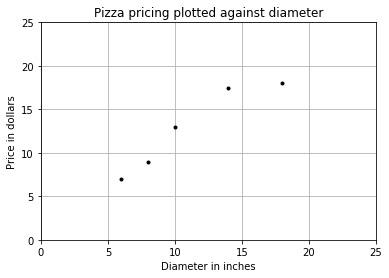

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X = [6, 8, 10, 14, 18]
X = np.array(X).reshape((-1, 1))
y = [7, 9, 13, 17.5, 18]
y = np.array(y).reshape((-1, 1))
plt.figure()
plt.title('Pizza pricing plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X,y, 'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = [6, 8, 10, 14, 18]
y = [7, 9, 13, 17.5, 18]
X = np.array(X).reshape((-1, 1))
print(X)
y = np.array(y).reshape((-1, 1))
print(y)
model.fit(X,y)
print('A 12" pizza should cost: $%.2f' % model.predict(12))

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[[  7. ]
 [  9. ]
 [ 13. ]
 [ 17.5]
 [ 18. ]]
A 12" pizza should cost: $13.68


### The Equation
y = B0 + B1 * x


B1 = $\frac{\sum\limits_{i=0}^{n}(x_i - mean(x)) * (y_i - mean(y)}{\sum\limits_{i=0}^{n}(x_i - mean(x))^2}$ 

or

B1 = corr(x,y) * $\frac{stdev(y)}{stdev(x)}$

B0 = mean(y) - B1 * mean(x)

### Error Estimation

RMSE = $\sqrt{\frac{\sum\limits_{i=0}^{n}(p_i - y_i)^2}{n}}$

In [59]:
# Simple LinearRegression fomular: y = aX + e
# y = output
# x = input
# e = error
# a = coefficient

# let find the best 'e' and' 'a'

xbar = (6+8+10+14+18)/5
print(xbar)
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2  + (18 - xbar)**2) / 4
print(variance)
#  or
print(np.var([6, 8, 10, 14, 18], ddof=1))

11.2
23.2
23.2


In [64]:
# N diamotion
from sklearn.linear_model import LinearRegression
X = [[6,2], [8,1], [10,0], [14,2], [18,0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2], [9,0], [11,2], [16,2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
print(predictions)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))

[[ 10.0625    ]
 [ 10.28125   ]
 [ 13.09375   ]
 [ 18.14583333]
 [ 13.3125    ]]
Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]


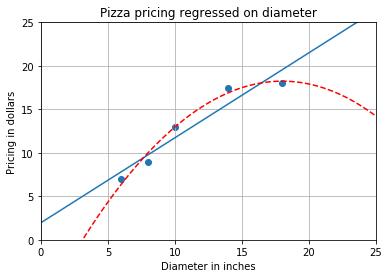

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared 0.809726797708
Quadratic regression r-squared 0.867544365635


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train =[[6], [8], [10] ,[14], [18]]
y_train = [[7],[9],[13], [17.5], [18]]

X_test = [[6],[8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

xx = np.linspace(0,26, 100)
#print(xx)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
#print(yy)
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza pricing regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Pricing in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

## Applying regression

In [81]:
import pandas as pd
header = ['']
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


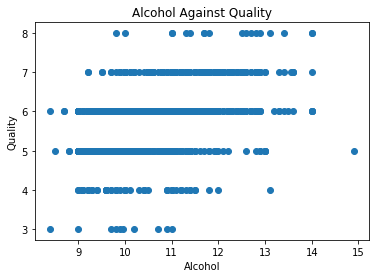

In [82]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.369087019536


In [88]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print( scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


In [116]:
# Stochastic Gradient Descent (SGD) Regressor
import numpy as np
from  sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train  = X_scaler.fit_transform(X_train)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
#print(y_train.reshape(y_train.shape[0], 1))
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

regressor = SGDRegressor(loss='squared_loss')
#print(X_train.reshape(X_train.shape[1] * X_train.shape[0], 1))
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('Cross validation r-squares scores: ', scores)
print('Average cross validation r-squared score: ', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('Test set r-squared score', regressor.score(X_test, y_test))

Cross validation r-squares scores:  [ 0.72828357  0.76042194  0.63273263  0.56298706  0.73521356]
Average cross validation r-squared score:  0.683927752102
Test set r-squared score 0.750907784149


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin